In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import pywt as pwt
import numpy as np

In [2]:
sns.set_theme(
    context = 'notebook',
    style = 'whitegrid',
)
    

# Dataset

##  Dataset Overview
The dataset contains various sensor readings (like light intensity, temperature, humidity, etc, throughout the time series) along with a categorical label called Plant_Health_Status. Our goal is to understand the relationships among these features, visualize patterns, and explore potential clustering structures in the data that reflect different plant health conditions.

## Dataset Quick Info
Here we load the dataset and view the first few rows and the statistical summary (mean, std, min, max, etc.) for each numeric column. This helps confirm that all features are numeric and gives us a sense of their scales and ranges before preprocessing.

In [3]:


data = pd.read_csv("./data/plant_health_data.csv")
display(data.info())
display(data.head())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               1200 non-null   object 
 1   Plant_ID                1200 non-null   int64  
 2   Soil_Moisture           1200 non-null   float64
 3   Ambient_Temperature     1200 non-null   float64
 4   Soil_Temperature        1200 non-null   float64
 5   Humidity                1200 non-null   float64
 6   Light_Intensity         1200 non-null   float64
 7   Soil_pH                 1200 non-null   float64
 8   Nitrogen_Level          1200 non-null   float64
 9   Phosphorus_Level        1200 non-null   float64
 10  Potassium_Level         1200 non-null   float64
 11  Chlorophyll_Content     1200 non-null   float64
 12  Electrochemical_Signal  1200 non-null   float64
 13  Plant_Health_Status     1200 non-null   object 
dtypes: float64(11), int64(1), object(2)
memo

None

,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,2024-10-03 10:54:53.407995,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,2024-10-03 16:54:53.407995,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2,2024-10-03 22:54:53.407995,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
3,2024-10-04 04:54:53.407995,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
4,2024-10-04 10:54:53.407995,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress


,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,5.500000,25.106918,23.999130,19.957794,54.853165,612.637265,6.524102,30.106751,30.264484,30.112088,34.749591,0.987764
std,2.873479,8.677725,3.441561,2.932073,8.784916,228.318853,0.581755,11.514396,11.466846,11.668085,8.766995,0.575116
min,1.000000,10.000724,18.001993,15.003710,40.028758,200.615482,5.507392,10.003650,10.017690,10.000606,20.025511,0.002376
25%,3.000000,17.131893,21.101766,17.353027,47.019694,416.878983,6.026042,20.249774,20.894445,19.585561,27.463350,0.487982
50%,5.500000,25.168333,23.889044,19.911473,54.692069,617.240221,6.540524,30.138590,30.019385,30.495054,34.433427,0.981647
75%,8.000000,32.370231,27.042634,22.596851,62.451053,811.474690,7.030039,40.184737,40.131459,40.108296,42.232637,1.473142
max,10.000000,39.993164,29.990886,24.995929,69.968871,999.856262,7.497823,49.951136,49.980700,49.981945,49.990811,1.996116


## Data Quality Check
We can verify whether or not there are any missing values in the dataset by checking if there is such entry by summing each entry with a `null` value.

In [4]:
print(data.isnull().sum())

Timestamp                 0
Plant_ID                  0
Soil_Moisture             0
Ambient_Temperature       0
Soil_Temperature          0
Humidity                  0
Light_Intensity           0
Soil_pH                   0
Nitrogen_Level            0
Phosphorus_Level          0
Potassium_Level           0
Chlorophyll_Content       0
Electrochemical_Signal    0
Plant_Health_Status       0
dtype: int64


From the result above, it does not seem like there are any missing values in the dataset. We can however clean them by dropping the rows.

In [5]:
# Drop missing values if any
data_clean = data.dropna()

In [6]:
# Extract Features for Model
def get_features(df, features = ["Plant_ID","Plant_Health_Status"]):
    return df.drop(columns = features)

In [7]:
def set_types(df):
    df['Timestamp'] = pd.to_datetime(df['Timestamp']).dt.floor("h")
    return df.set_index("Timestamp")

In [8]:
def standardize(df, index = None):
    x = StandardScaler().fit_transform(df)
    return pd.DataFrame(data=x, columns=df.columns, index=index)

In [9]:
def extract_features(df):
    return (df.pipe(set_types).pipe(get_features).pipe(standardize, df['Timestamp']))

In [10]:
X_scaled = extract_features(data)

## Data Visualization & Dimensionality Reduction (t-SNE)
We apply t-SNE to create a nonlinear visualization that projects the data into a reduced-dimensional space, helping us better understand the structure and relationships among data points.

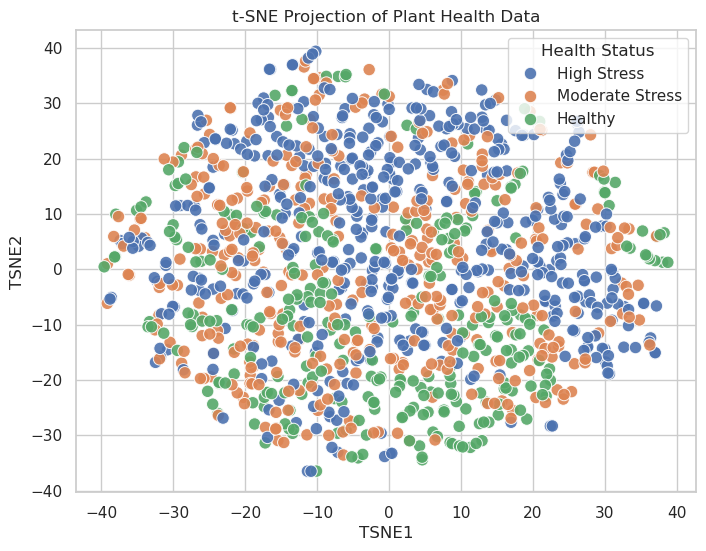

In [11]:


# t-SNE
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
data["TSNE1"], data["TSNE2"] = X_tsne[:, 0], X_tsne[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=data,
    x="TSNE1",
    y="TSNE2",
    hue="Plant_Health_Status",
    s=80,
    alpha=0.9
)
plt.title("t-SNE Projection of Plant Health Data")
plt.legend(title="Health Status")
plt.grid(True)
plt.show()

## Label Distribution

In our Dataset we have 3 classes. Healthy, Moderately Stressed and Highly Stressed indicating the stress level for each plant.  The Distribution of Classes is fairly even, however healthy plants make up 25% of the examples where stressed plant make up 75% of examples

In [12]:
y = data.loc[:,['Timestamp','Plant_Health_Status']].pipe(set_types)
y.index = y.index.floor("h")
y.head()

,Plant_Health_Status
Timestamp,
2024-10-03 10:00:00,High Stress
2024-10-03 16:00:00,High Stress
2024-10-03 22:00:00,High Stress
2024-10-04 04:00:00,High Stress
2024-10-04 10:00:00,High Stress


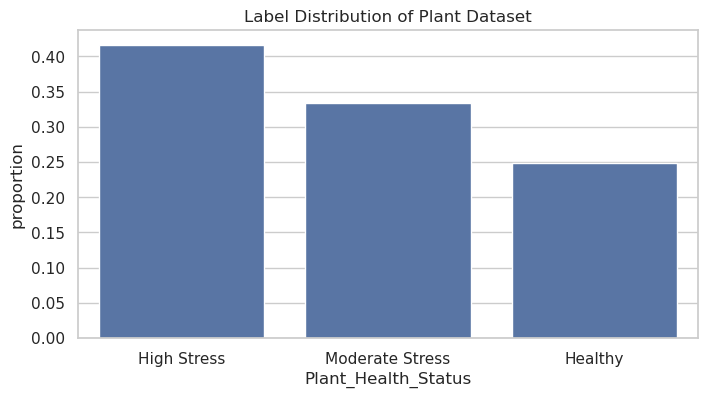

In [13]:
proportions = y.value_counts(normalize = True)
plt.figure(figsize = (8,4))
sns.barplot(proportions.reset_index(),x = "Plant_Health_Status",y='proportion')
plt.title("Label Distribution of Plant Dataset")
_ = 0 # not show plotting info

Since our dataset is a timeseries dataset, we wanted to explore whether our labels had a time dependence. We computed the proportion of classes at different timescales.  By normalizing them we treat them as probabilities for each class.

In [14]:
def proportion(group):
    group = group.drop(columns = 'Timestamp')
    return group.value_counts(normalize = True)

In [15]:
stress_levels = y.reset_index().groupby("Timestamp").apply(proportion).reset_index()
stress_per_sample = stress_levels.pivot(
    index='Timestamp',
    columns='Plant_Health_Status',
    values='proportion'
).fillna(0)

/tmp/ipykernel_32941/2833807432.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stress_levels = y.reset_index().groupby("Timestamp").apply(proportion).reset_index()


In [16]:
order = ["Healthy","Moderate Stress", "High Stress"]
daily = stress_per_sample.resample("D").mean()[order]
weekly = stress_per_sample.resample("W").mean()[order]

## Label Probabilities over Time
Over the month that our dataset is sampled for we do see periodic changes in the probability of each class.  This suggests that our features do have a time dependence that could obscure informative changes in the features

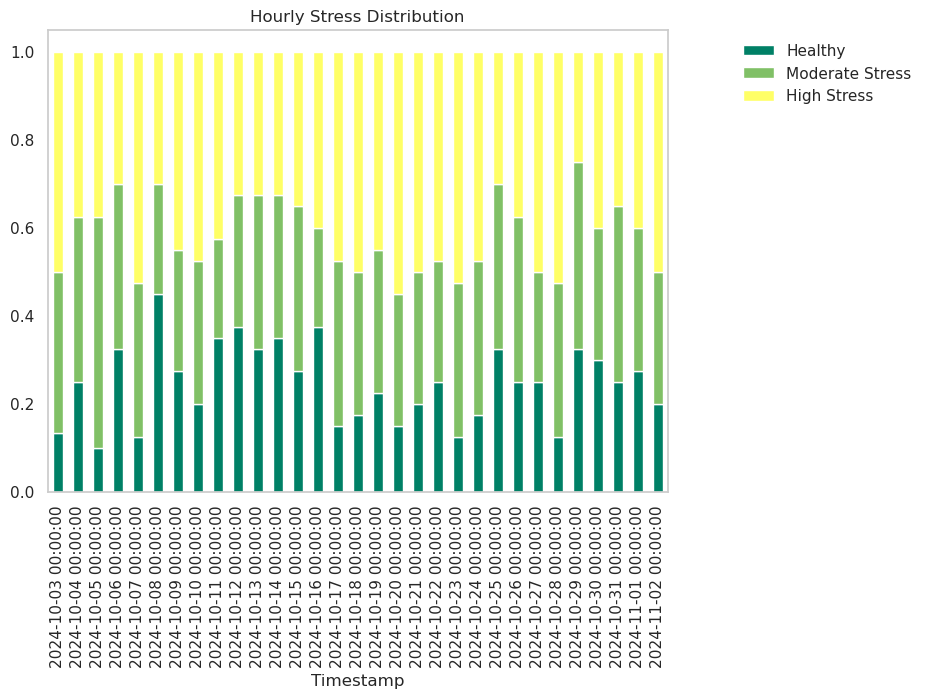

In [17]:
daily.plot(kind='bar', stacked=True, colormap='summer', figsize=(8,6))
plt.legend(frameon = False,bbox_to_anchor = (1.1,1))
plt.title("Hourly Stress Distribution")
plt.grid(False)

Our data is sampled 4 times per day. 
we show below for each sampling time the probability of each class.
We see that the probability does not change over the course of the day.

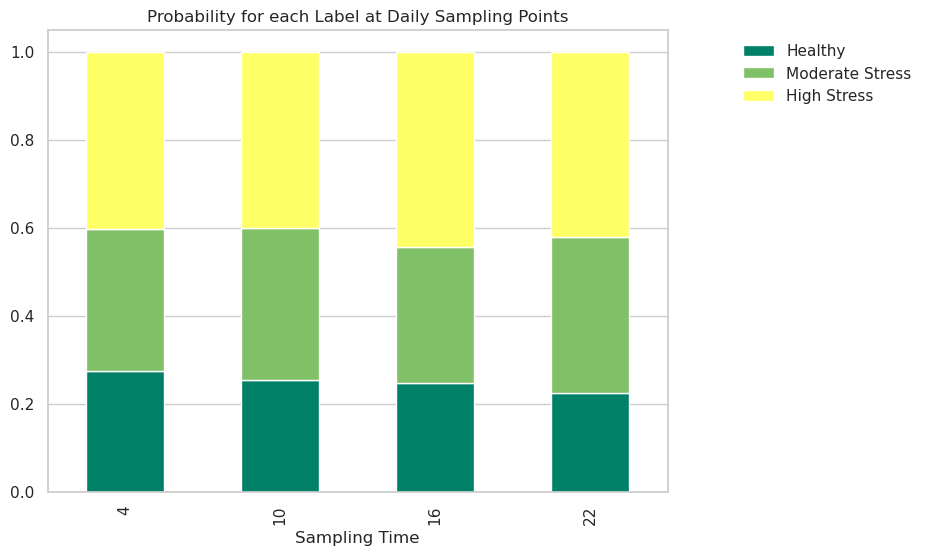

In [18]:
stress_per_sample['hour'] = stress_per_sample.index.hour
hourly = stress_per_sample.groupby('hour').mean()[order]
hourly.plot(kind='bar', stacked=True, colormap='summer', figsize=(8,6))
plt.legend(frameon = False,bbox_to_anchor = (1.1,1))
plt.title("Probability for each Label at Daily Sampling Points")
plt.xlabel("Sampling Time")
plt.grid(axis = 'x')

## Correlation / Feature Extraction
Since our data is a time series we extract wavelet features using the stationary wavelet transform.  This allow us to add features that correspond to different frequency levels of the features and incorperate the time dependencies of the dataset.

In [19]:
def wavelet(col, level = 3, method = 'db2'):
    '''
        Compute Stationary Wavelets for A Given Column
        Params: 
        * col: pd.Series column to perform DWT on
        * level: int number of resolution to look at
        * method: str method to use
    '''
    waves = pwt.swt(col, wavelet = method, level = level)
    cols = pd.DataFrame(index=col.index)
    for l in range(level):
        cols[f'{col.name}_a_{l}'] = waves[l][0]
        cols[f'{col.name}_d_{l}'] = waves[l][0]
    return cols

In [20]:
def wavelet_features(df, levels = 3, method = 'db2'):
    '''
        Applies wavelet function column wise.  Output is axpanded into a larger dataframe
        * Pandas Dataframe with all numeric columns
        * level: int number of resolution to look at
        * method: str method to use
    '''
    wave_dfs = [wavelet(df[col],level=levels, method=method) for col in df.columns]
    return pd.concat(wave_dfs, axis=1)

Initially we see no correlations between features

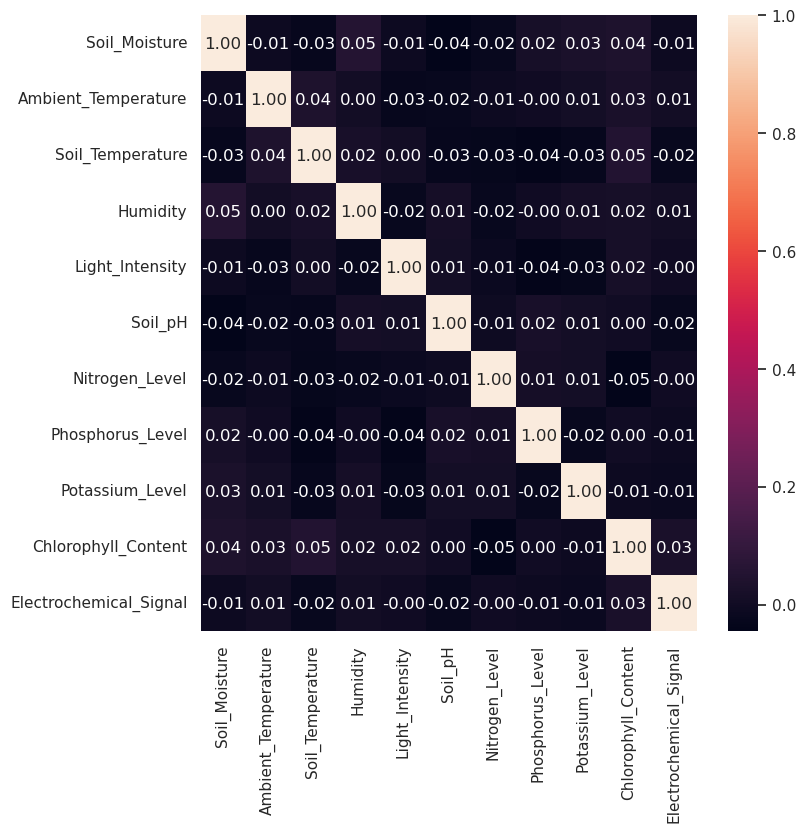

In [21]:
plt.figure(figsize = (8,8))
matrix = sns.heatmap(X_scaled.corr(),annot=True,fmt=".2f")

In [22]:
w = wavelet_features(X_scaled, levels= 3)
w.head()

,Soil_Moisture_a_0,Soil_Moisture_d_0,Soil_Moisture_a_1,Soil_Moisture_d_1,Soil_Moisture_a_2,Soil_Moisture_d_2,Ambient_Temperature_a_0,Ambient_Temperature_d_0,Ambient_Temperature_a_1,Ambient_Temperature_d_1,...,Chlorophyll_Content_a_1,Chlorophyll_Content_d_1,Chlorophyll_Content_a_2,Chlorophyll_Content_d_2,Electrochemical_Signal_a_0,Electrochemical_Signal_d_0,Electrochemical_Signal_a_1,Electrochemical_Signal_d_1,Electrochemical_Signal_a_2,Electrochemical_Signal_d_2
Timestamp,,,,,,,,,,,,,,,,,,,,,
2024-10-03 10:00:00,-0.338040,-0.338040,-0.307332,-0.307332,0.048056,0.048056,-0.502101,-0.502101,-0.802682,-0.802682,...,0.736888,0.736888,0.185142,0.185142,-1.210218,-1.210218,-1.891637,-1.891637,-1.199345,-1.199345
2024-10-03 16:00:00,-0.436128,-0.436128,-0.890276,-0.890276,-0.917618,-0.917618,-0.777037,-0.777037,-0.867411,-0.867411,...,0.296199,0.296199,-0.410440,-0.410440,-1.431113,-1.431113,-1.579479,-1.579479,-1.244327,-1.244327
2024-10-03 22:00:00,-0.767820,-0.767820,-1.219515,-1.219515,-1.817405,-1.817405,-0.939088,-0.939088,-0.883425,-0.883425,...,0.501118,0.501118,0.356297,0.356297,-1.435452,-1.435452,-0.926054,-0.926054,-0.617273,-0.617273
2024-10-04 04:00:00,-0.857972,-0.857972,-1.164650,-1.164650,-1.069788,-1.069788,-0.672612,-0.672612,-0.475881,-0.475881,...,0.959141,0.959141,0.978701,0.978701,-1.263232,-1.263232,-0.296358,-0.296358,0.824694,0.824694
2024-10-04 10:00:00,-0.268732,-0.268732,0.137982,0.137982,1.111703,1.111703,-0.132347,-0.132347,0.160068,0.160068,...,1.670545,1.670545,1.510058,1.510058,-1.059548,-1.059548,0.052936,0.052936,0.635818,0.635818


However once we plot the extracted wavelet features we see patterns emerge.
* Ambient Temperature and Soil Mosture correlate together
* Potassium, Nitrogen Level and Soil Moisture have some correlation
* Humidity and Soil PH


Text(0.5, 1.0, 'Correlation of Feature Fequencies')

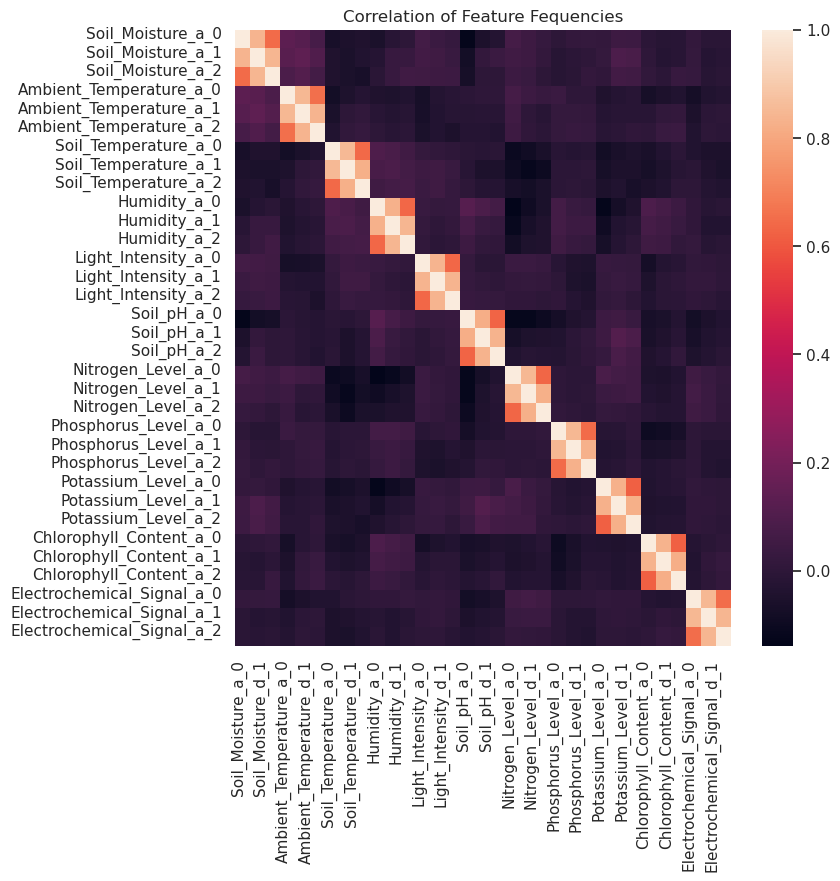

In [23]:
plt.figure(figsize = (8,8))
sns.heatmap(w.corr())
plt.title("Correlation of Feature Fequencies")

With Wavelet Features we have 66 columns, which is a lot. Further since columns share similar low frequency features there's redundant information. We also see some correlation between our features.  We will improve that with PCA, extracting orthogonal bases from our data and reducing the dimensionality. 

## Dimensionality Reduction (PCA)
Looking at the explained variance ratio, allows us to see how many PCs we need to keep to explain a certain percentage of the variance of our dataset.  From the plot below we only need 10 PCs for our dataset.

Text(0.5, 1.0, 'PCA Cumulative Explained Variance')

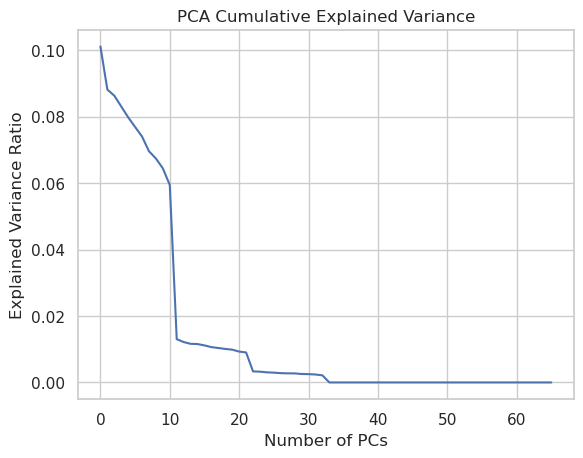

In [24]:
pca = PCA()
transformed = pca.fit_transform(w)
sns.lineplot(pca.explained_variance_ratio_)
plt.xlabel("Number of PCs")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Cumulative Explained Variance")

In [25]:
columns = [f"PC{i+1}" for i in range(10)]
extracted = pd.DataFrame(index= w.index, columns = columns, data = transformed[:,:10])
extracted.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Timestamp,,,,,,,,,,
2024-10-03 10:00:00,1.148987,1.823031,-3.500839,-1.795380,-2.677185,-2.127870,-2.987914,1.763612,-1.686334,-0.838349
2024-10-03 16:00:00,2.345584,0.598532,-1.969717,-2.291129,-0.753475,-1.205475,-3.668984,0.247653,-0.619323,-1.428495
2024-10-03 22:00:00,3.074753,-0.309689,-3.420327,-2.834444,1.146124,-1.187573,-3.788517,0.945317,-0.334954,-0.485949
2024-10-04 04:00:00,3.473119,0.869572,-5.076910,-3.030447,2.039383,-0.668701,-1.703866,3.316102,-0.869556,0.923840
2024-10-04 10:00:00,2.437234,3.715368,-4.392024,-2.471296,4.100876,-1.259437,0.094338,4.661629,-2.441173,0.973709


# Relationship of Features to Classes

/home/isaac/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Mutual Information between Features and Classes')

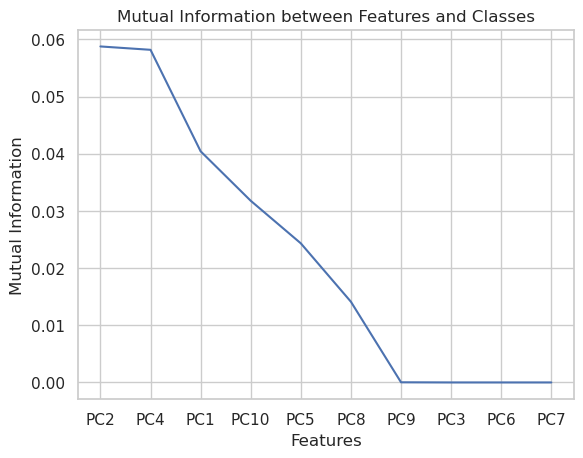

In [26]:
mi = mutual_info_classif(extracted, y)
mi = pd.Series(index = extracted.columns, data = mi).sort_values(ascending = False)
sns.lineplot(mi)
plt.xlabel("Features")
plt.ylabel("Mutual Information")
plt.title("Mutual Information between Features and Classes")

In [34]:
extracted_tsne = tsne.fit_transform(extracted)
pts = pd.DataFrame(data = extracted_tsne,index = extracted.index, columns = ['T1','T2'])
pts['y'] = y

Text(0.5, 1.0, 'T-SNE of Extracted Features')

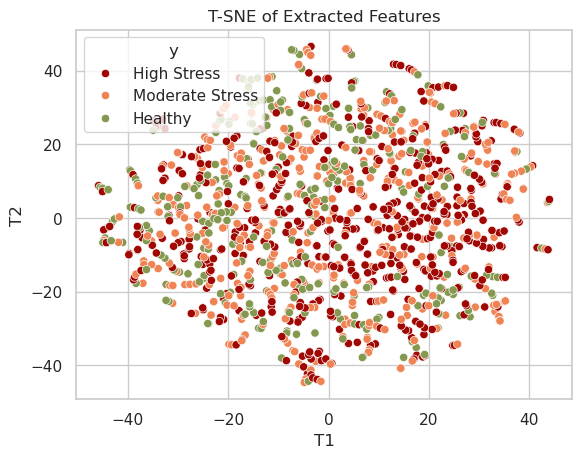

In [39]:
sns.scatterplot(pts,x = "T1",y = "T2",hue = 'y',palette=['#A10702','#EF8354','#84994F'])
plt.title("T-SNE of Extracted Features")